# How the sausage is made

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Generate random numbers as an example
rn = np.random.uniform(low=0, high=1, size=(20,))

# Make a random plot...
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rn,"r")
ax.grid()
#######################


# Setup the canvas object to extract images INCLUDING axes elements
width = 900 #pixels
height = 150 #pixels
# matplotlib likes image sizes in inches (thanks America)
# so we need to now how many pixels fit on an inch on your screen (DotsPerInch)
DPI = fig.get_dpi()
fig.set_size_inches(width/float(DPI),height/float(DPI))
fig.canvas.draw()
#######################

# Now we can save it to a numpy array. These are faily obscure functions...
# the .tostring_rgb() generates a binary representation of the WHOLE plot
# np.frombuffer reads the binary and interprets it as a collection of integers
# At the end they're just a long list of RGB colors in 1 dimension
data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)

# Retrieve the original shape of the plot inverted (height, width)
im_shape = fig.canvas.get_width_height()[::-1]

# We can now make a 3-D array (height, width, 3) "one 2D image per color channel"
data = data.reshape(*im_shape, 3)

In [ ]:
plt.imshow(data[:,0:150,2], cmap="Greys_r")

In [ ]:
plt.imshow(data[:,150:300,2], cmap="Greys_r")

In [6]:
shrimplin = pd.read_csv('shrimplin.csv')


In [858]:
def logchunks(wellname, GR):
    
    width = 150
    height = 900
   
    ########## mask chunks whose value is the same everywhere (blank chunks),
    ########## stop feeling like a potato
    
    fig = plt.figure()
    ax1 = fig.add_subplot(232)
    ax1.plot(GR, 'Depth', "r", data = wellname)
    ax1.set(xlabel = GR)
    ax1.grid()
    plt.gca().invert_yaxis()
    DPI = fig.get_dpi()
    fig.set_size_inches(width/float(DPI),height/float(DPI))
    fig.canvas.draw()
    plt.close('all')

    bawps_new = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    im_shape = fig.canvas.get_width_height()[::-1]
    bawps_new = bawps_new.reshape(*im_shape, 3)
    
    numchunk = 10
    chunks2 = []
    for i in range(numchunk):
        #plt.subplots()
        Depth_array = np.array(wellname['Depth']).size
        chunklen = int(Depth_array/numchunk)
        chunks1 = ((bawps_new[(i*chunklen):((i+1)*chunklen), : ,2]))
        chunks2.append(chunks1)
    sum_if_blank = 255*chunklen*int(chunks2[0].shape[1])
    chunks = [x for x in chunks2 if np.sum(x) != sum_if_blank]
    
    for i in range(len(chunks)):
        plt.subplots()
        plt.imshow(chunks[i], cmap = "Greys_r")
        
#return list of chunks here, do they need to be saved as a file?
    return chunks

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

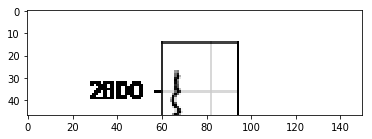

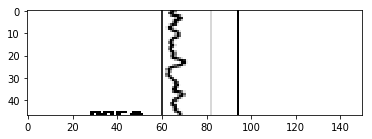

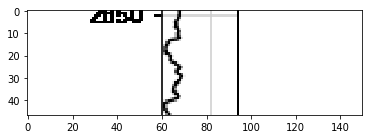

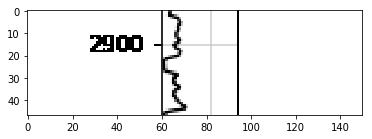

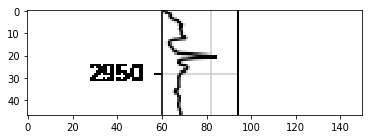

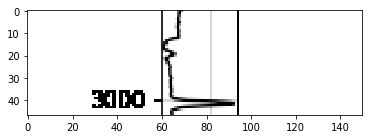

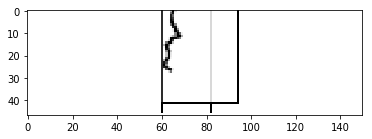

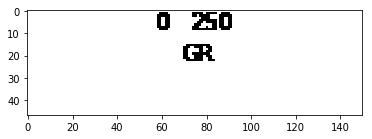

In [859]:
logchunks(shrimplin,'GR')

In [851]:
import zipfile; import os; import urllib

os.makedirs('./temp', exist_ok=True)
laspath = 'http://www.kgs.ku.edu/PRS/Ora_Archive/ks_las_files.zip'

las_handle, _ = urllib.request.urlretrieve(laspath)

with zipfile.ZipFile(las_handle,'r') as zip_las:
    zip_las.extractall('temp')

In [9]:
lases = pd.read_csv('temp/ks_las_files.txt', parse_dates=True)

In [11]:
lases.describe()

,KGS_ID,Latitude,Longitude,Elevation,Depth_start,Depth_stop
count,1.916500e+04,19165.000000,19165.000000,19159.000000,19165.000000,19165.000000
mean,1.031486e+09,38.276476,-99.249304,2173.781260,800.008736,3840.647071
std,1.764971e+07,0.765191,1.697671,706.455206,1295.930823,1745.073655
min,1.001184e+09,36.994026,-102.043705,5.000000,-46.000000,-18.700000
25%,1.006144e+09,37.604628,-100.600278,1716.000000,1.000000,3276.000000
50%,1.043236e+09,38.294353,-99.465587,2146.000000,200.000000,3961.500000
75%,1.044240e+09,38.816418,-98.531039,2788.000000,995.000000,4760.000000
max,1.046666e+09,40.001832,-94.629981,3955.000000,38550.000000,63841.000000


In [19]:
def logchunks(wellname, GR):
    
    width = 150
    height = 900
   
    ###################### hide first plot, stop feeling like a potato
    
    fig = plt.figure()
    ax1 = fig.add_subplot(232)
    ax1.plot(GR, 'Elevation', "r", data = wellname)
    ax1.set(xlabel = GR)
    ax1.grid()
    plt.gca().invert_yaxis()
    DPI = fig.get_dpi()
    fig.set_size_inches(width/float(DPI),height/float(DPI))
    fig.canvas.draw()
    plt.close('all')

    bawps_new = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    im_shape = fig.canvas.get_width_height()[::-1]
    bawps_new = bawps_new.reshape(*im_shape, 3)
    
    numchunk = 10
    for i in range(numchunk):
        plt.subplots()
        Depth_array = np.array(wellname['Elevation']).size
        chunklen = int(Depth_array/numchunk)
        plt.imshow((bawps_new[(i*chunklen):((i+1)*chunklen), : ,2]), cmap="Greys_r")
        

        

/Users/chance/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


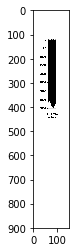

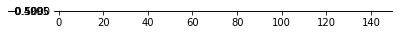

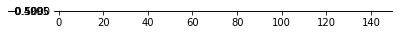

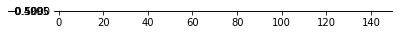

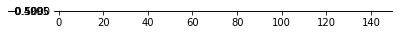

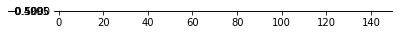

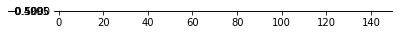

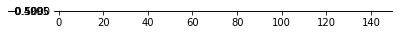

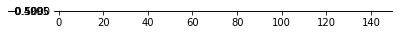

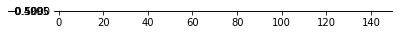

In [20]:
logchunks(lases, 'Latitude')